# 基于当当网读者最爱课外书信息研究

## 目录<a id='toc0_'></a>     
  - [摘要](#toc1_1_)    
  - [ABSTRACT](#toc1_2_)    
  - [一、前言](#toc1_3_)    
  - [二、数据获取](#toc1_4_)    
  - [三、数据预处理](#toc1_5_)    
    - [1.导入模块](#toc1_5_1_)    
    - [2.导入数据集](#toc1_5_2_)    
    - [3.数据概览](#toc1_5_3_)    
    - [4.数据清洗](#toc1_5_4_)    
    - [5.数据转换](#toc1_5_5_)    
    - [6.保存数据处理后的数据集](#toc1_5_6_)    
  - [四、数据分析](#toc1_6_)    
    - [1.构建新的数据集](#toc1_7_)    
    - [2.统计计算分析](#toc1_7_1_)    
      - [1）总体数据分析](#toc1_7_2_)    
      - [2）最多平均评论数作者的书籍价格及折扣比例](#toc1_7_3_)    
      - [3）最多评论总量的作者](#toc1_7_5_)    
      - [4）最热门出版社推荐](#toc1_7_7_)    
  
    - [3.单个特征分析](#toc1_8_)    
      - [1）书籍价格及折扣比例分布情况](#toc1_8_1_)    
      - [2）书籍推荐值的分布情况](#toc1_8_2_)    
      - [3）书籍评论数的分布情况](#toc1_8_3_)    
      - [4）书籍出版年份的分布情况](#toc1_8_4_)  
      - [5）书籍上榜分布情况](#toc1_7_6_)  
    - [4.特征间关系分析](#toc1_9_)    
      - [1）书籍排名与书籍评论数的关系](#toc1_9_1_)    
      - [2）书籍评论数与推荐值的关系](#toc1_9_2_)    
      - [3）书籍折扣比例与评论数的关系](#toc1_9_4_)   
      - [4）书籍出版年份与评论数的关系](#toc1_7_9_) 
      - [5）书籍出版年份及原价的关系](#toc1_9_3_)  
    - [5.探索性数据分析](#toc1_10_)    
      - [1）查看书籍上榜数量最多的作者](#toc1_10_1_) 
      - [2）折扣价最高的书籍](#toc1_7_4_)  
      - [3）各个出版社出版的书籍数量](#toc1_7_8_)  
      - [4）热门作者推荐](#toc1_10_2_)    
      - [5）热门书籍推荐](#toc1_10_3_)     
  - [五、结论](#toc1_12_)    

## <a id='toc1_1_'></a>[摘要](#toc0_)
本研究基于当当网读者最爱的课外书信息，旨在分析不同类型书籍的销售情况及其背后的影响因素。通过对畅销书目录和属性的深入挖掘，我们可以了解到读者的阅读偏好，以便可以预测读者的阅读兴趣和趋势，从而为出版商和书店提供有价值的市场洞察。

## <a id='toc1_2_'></a>[ABSTRACT](#toc0_)
Based on the information of Dangdang's readers' favorite extracurricular books, this study aims to analyze the sales of different types of books and the influencing factors behind them. By digging deeper into bestseller catalogs and attributes, we can understand readers' reading preferences so that we can predict readers' reading interests and trends, providing valuable market insights for publishers and bookstores.

## <a id='toc1_3_'></a>[一、前言](#toc0_)
- 阅读是知识获取的重要途径之一，对个人成长和社会发展具有深远影响。在数字化时代，电子商务平台如当当网成为了读者获取图书的重要渠道。了解读者的阅读偏好和购买行为，有助于出版商、书店以及教育机构更好地满足市场需求。
- 本研究通过分析不同类型书籍的销售情况，探讨影响图书销售的关键因素。通过对这些数据的深入挖掘，我们可以揭示读者在不同时间段、不同类别中的阅读兴趣变化，从而为出版商提供有针对性的营销策略建议。
- 作为一个主要的在线图书销售平台，当当网积累了大量关于图书销售的数据。这些数据不仅包括每本书的销售量，还包括其类别、作者、出版时间等详细信息。通过对这些数据进行系统化分析，我们可以全面了解当前市场上哪些类型的图书最受欢迎，以及这些畅销书背后的共同特征。

## <a id='toc1_4_'></a>[二、数据获取](#toc0_)
数据源自别人爬取的当当网TOP图书榜单：
- 下载链接: https://pan.baidu.com/s/1OzasqaQ8zio2XUWQiYDxiw?pwd=u2q6

## <a id='toc1_5_'></a>[三、数据预处理](#toc0_)

### <a id='toc1_5_1_'></a>[1.导入模块](#toc0_)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## 设置中文显示
plt.rcParams["font.sans-serif"] = "SimHei"
plt.rcParams["axes.unicode_minus"] = False
# 显示所有变量
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### <a id='toc1_5_2_'></a>[2.导入数据集](#toc0_)

In [134]:
data = pd.read_excel("当当网课外书信息.xlsx",encoding='utf-8')

### <a id='toc1_5_3_'></a>[3.数据概览](#toc0_)

In [135]:
data.head()
data.info()
data.describe()
data.shape

,书名,作者,出版日期,出版社,原价,折扣价,折扣比例,排序,排行榜类型,推荐值,电子书价格,评论数
0,你当像鸟飞往你的山（中文版销量超200万册，比尔·盖茨年度特别推,塔拉,2019-11-01,南海出版公司,44.25,59.0,7.5折,1,2020年,100%,24.99,1707176.0
1,人间失格（日本小说家太宰治代表作，一个对村上春树影响至深的绝,太宰治,2015-08-01,作家出版社,9.80,25.0,3.9折,2,2020年,99.8%,4.99,2227359.0
2,乌合之众 : 大众心理研究（群体心理学创始人古斯塔夫·勒庞代表作,古斯塔夫·勒庞,2018-04-06,民主与建设出版社,10.10,26.0,3.9折,3,2020年,100%,NaN,752441.0
3,神奇校车·图画书版（全12册）,乔安娜柯尔,2018-05-10,贵州人民出版社,88.00,198.0,4.4折,4,2020年,99.9%,NaN,1784528.0
4,作家榜名著：月亮与六便士（159万+读者高分推荐版！好评率高达99,毛姆,2017-01-10,浙江文艺出版社,19.90,39.8,5.0折,5,2020年,100%,3.99,1591320.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
书名       2000 non-null object
作者       1997 non-null object
出版日期     1999 non-null object
出版社      2000 non-null object
原价       2000 non-null float64
折扣价      2000 non-null float64
折扣比例     2000 non-null object
排序       2000 non-null int64
排行榜类型    2000 non-null object
推荐值      2000 non-null object
电子书价格    693 non-null float64
评论数      1996 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 187.6+ KB


,原价,折扣价,排序,电子书价格,评论数
count,2000.000000,2000.000000,2000.000000,693.000000,1.996000e+03
mean,33.008070,61.707300,250.500000,25.239942,3.783756e+05
std,36.121711,66.719261,144.373376,28.878313,4.228657e+05
min,2.100000,14.800000,1.000000,0.000000,4.900000e+01
25%,14.700000,29.900000,125.750000,7.960000,1.298500e+05
50%,24.500000,45.000000,250.500000,20.440000,2.400860e+05
75%,37.500000,64.000000,375.250000,35.760000,4.304990e+05
max,455.400000,828.000000,500.000000,405.000000,3.427401e+06


(2000, 12)

### <a id='toc1_5_4_'></a>[4.数据清洗](#toc0_)

In [136]:
#查看数据
data.head()

,书名,作者,出版日期,出版社,原价,折扣价,折扣比例,排序,排行榜类型,推荐值,电子书价格,评论数
0,你当像鸟飞往你的山（中文版销量超200万册，比尔·盖茨年度特别推,塔拉,2019-11-01,南海出版公司,44.25,59.0,7.5折,1,2020年,100%,24.99,1707176.0
1,人间失格（日本小说家太宰治代表作，一个对村上春树影响至深的绝,太宰治,2015-08-01,作家出版社,9.80,25.0,3.9折,2,2020年,99.8%,4.99,2227359.0
2,乌合之众 : 大众心理研究（群体心理学创始人古斯塔夫·勒庞代表作,古斯塔夫·勒庞,2018-04-06,民主与建设出版社,10.10,26.0,3.9折,3,2020年,100%,NaN,752441.0
3,神奇校车·图画书版（全12册）,乔安娜柯尔,2018-05-10,贵州人民出版社,88.00,198.0,4.4折,4,2020年,99.9%,NaN,1784528.0
4,作家榜名著：月亮与六便士（159万+读者高分推荐版！好评率高达99,毛姆,2017-01-10,浙江文艺出版社,19.90,39.8,5.0折,5,2020年,100%,3.99,1591320.0


不难发现，原价比折扣价价格还低，很显然，原价和折扣价标反了，下面进行处理。

In [137]:
df=data['原价'].copy()
data['原价'] = data['折扣价']
data['折扣价'] = df
data.head(2)

,书名,作者,出版日期,出版社,原价,折扣价,折扣比例,排序,排行榜类型,推荐值,电子书价格,评论数
0,你当像鸟飞往你的山（中文版销量超200万册，比尔·盖茨年度特别推,塔拉,2019-11-01,南海出版公司,59.0,44.25,7.5折,1,2020年,100%,24.99,1707176.0
1,人间失格（日本小说家太宰治代表作，一个对村上春树影响至深的绝,太宰治,2015-08-01,作家出版社,25.0,9.80,3.9折,2,2020年,99.8%,4.99,2227359.0


In [138]:
#查看各列缺失值
data.isna().sum()
#查看重复值
data.duplicated().sum()

书名          0
作者          3
出版日期        1
出版社         0
原价          0
折扣价         0
折扣比例        0
排序          0
排行榜类型       0
推荐值         0
电子书价格    1307
评论数         4
dtype: int64

0

考虑到电子书价格缺失值占比过大，这里直接删除这一特征列。

In [139]:
#删除电子书该列
data.drop(columns=['电子书价格'],inplace=True)

In [140]:
# 输出其他缺失值的行
data[data.isna().any(axis=1)]

,书名,作者,出版日期,出版社,原价,折扣价,折扣比例,排序,排行榜类型,推荐值,评论数
233,一级建造师 2020教材 2020版一级建造师 建筑工程管理与实务,NaN,NaN,中国建筑工业出版社,78.0,61.60,7.9折,234,2020年,100%,233874.0
731,中国共产党简史（32开）2021党史学习教育系列读物领导干部学习指,NaN,2021-02-25,人民出版社,42.0,32.20,7.7折,232,2021年,100%,23789.0
1355,习近平谈治国理政（第四卷）（中文平装）,习近平,2022-06-30,外文出版社,80.0,65.00,8.1折,356,2022年,0%,NaN
1715,《习近平新时代中国特色社会主义思想学习纲要（2023年版）》小字,中共中央宣传部,2023-04-08,学习出版社,16.0,13.60,8.5折,216,2023年,0%,NaN
1866,习近平著作选读第二卷普及本 （100册以上团购请联系团购电话4001,习近平,2023-04-07,人民出版社,34.0,28.90,8.5折,367,2023年,0%,NaN
1869,习近平著作选读第一卷普及本 （100册以上团购请联系团购电话4001,习近平,2023-04-07,人民出版社,35.0,29.75,8.5折,370,2023年,0%,NaN
1908,写给青少年的古文观止全套5册正版小古文小学初中高中注音详解注释,NaN,2022-05-01,民主与建设出版社,228.0,25.90,1.1折,409,2023年,100%,40597.0


通过观察各列的缺失值我们可以发现：
- 作者：缺失值较少，可以选择去网上查找进行填充。
- 出版日期：缺失值较少，可以选择去网上查找进行填充。
- 评论数：缺失值较少，可以选择用评论数的平均值填充。
- 推荐值：存在推荐值为0的书籍，考虑是否因为不存在评论，导致推荐值为0，后续进一步处理查看。

In [141]:
#在网上查找相应书籍对应的作者及出版日期进行填充
data.loc[data['书名'] == '一级建造师 2020教材 2020版一级建造师 建筑工程管理与实务','作者'] = '全国一级建造师执业资格考试用书编写委员会'
data.loc[data['书名'] == '一级建造师 2020教材 2020版一级建造师 建筑工程管理与实务','出版日期'] = '2020-05-01'
data.loc[data['书名'] == '中国共产党简史（32开）2021党史学习教育系列读物领导干部学习指','作者'] = '中国共产党简史编写组'
data.loc[data['书名'] == '写给青少年的古文观止全套5册正版小古文小学初中高中注音详解注释','作者'] = '伊泽'

In [142]:
#查看推荐值为0的书籍是否异常
data[data['推荐值'] == '0%']

,书名,作者,出版日期,出版社,原价,折扣价,折扣比例,排序,排行榜类型,推荐值,评论数
1355,习近平谈治国理政（第四卷）（中文平装）,习近平,2022-06-30,外文出版社,80.0,65.00,8.1折,356,2022年,0%,NaN
1715,《习近平新时代中国特色社会主义思想学习纲要（2023年版）》小字,中共中央宣传部,2023-04-08,学习出版社,16.0,13.60,8.5折,216,2023年,0%,NaN
1866,习近平著作选读第二卷普及本 （100册以上团购请联系团购电话4001,习近平,2023-04-07,人民出版社,34.0,28.90,8.5折,367,2023年,0%,NaN
1869,习近平著作选读第一卷普及本 （100册以上团购请联系团购电话4001,习近平,2023-04-07,人民出版社,35.0,29.75,8.5折,370,2023年,0%,NaN


果然，推荐值为0的书籍，都是没有评论的，把推荐值为0%的值，替换成100%，评论数的话就用平均值填充。

In [143]:
#推荐值的填充
data['推荐值'] = data['推荐值'].replace('0%','100%')
#评论数的填充
data['评论数'] = data['评论数'].fillna(data['评论数'].mean())
data.isnull().sum()

书名       0
作者       0
出版日期     0
出版社      0
原价       0
折扣价      0
折扣比例     0
排序       0
排行榜类型    0
推荐值      0
评论数      0
dtype: int64

### <a id='toc1_5_5_'></a>[5.数据转换](#toc0_)

In [144]:
# 将排行榜类型中的“年”去掉
data['排行榜类型'] = data['排行榜类型'].str.replace('年','').astype(int)

In [145]:
# 将评论数转换为整数
data['评论数'] = data['评论数'].astype(int)

In [146]:
# 将出版日期转换为日期格式
data['出版日期'] = pd.to_datetime(data['出版日期']).apply(lambda x: x.date())

In [147]:
# 将折扣比例转换为浮点数，并去掉'折'字符
data['折扣比例'] = data['折扣比例'].str.replace('折','').astype(float)

In [148]:
# 将推荐值从百分比字符串转换为浮点数
data['推荐值'] = data['推荐值'].str.replace('%','').astype(float) 

In [149]:
#查看处理好的数据
data.head()
data.dtypes

,书名,作者,出版日期,出版社,原价,折扣价,折扣比例,排序,排行榜类型,推荐值,评论数
0,你当像鸟飞往你的山（中文版销量超200万册，比尔·盖茨年度特别推,塔拉,2019-11-01,南海出版公司,59.0,44.25,7.5,1,2020,100.0,1707176
1,人间失格（日本小说家太宰治代表作，一个对村上春树影响至深的绝,太宰治,2015-08-01,作家出版社,25.0,9.80,3.9,2,2020,99.8,2227359
2,乌合之众 : 大众心理研究（群体心理学创始人古斯塔夫·勒庞代表作,古斯塔夫·勒庞,2018-04-06,民主与建设出版社,26.0,10.10,3.9,3,2020,100.0,752441
3,神奇校车·图画书版（全12册）,乔安娜柯尔,2018-05-10,贵州人民出版社,198.0,88.00,4.4,4,2020,99.9,1784528
4,作家榜名著：月亮与六便士（159万+读者高分推荐版！好评率高达99,毛姆,2017-01-10,浙江文艺出版社,39.8,19.90,5.0,5,2020,100.0,1591320


书名        object
作者        object
出版日期      object
出版社       object
原价       float64
折扣价      float64
折扣比例     float64
排序         int64
排行榜类型      int32
推荐值      float64
评论数        int32
dtype: object

### <a id='toc1_5_6_'></a>[6.保存数据处理后的数据集](#toc0_)

In [150]:
data.to_excel("当当网课外书信息2.xlsx",encoding='utf-8',index=False)

## <a id='toc1_6_'></a>[四、数据分析](#toc0_)

### <a id='toc1_7_'></a>[1.构建新的数据集](#toc0_)

In [5]:
#读取清洗后的数据集
data2=pd.read_excel("当当网课外书信息2.xlsx",encoding='utf-8')

In [6]:
#可能存在同个作者同本书上榜多次的情况
data2.loc[data2["作者"]=="毛姆",:]

,书名,作者,出版日期,出版社,原价,折扣价,折扣比例,排序,排行榜类型,推荐值,评论数
4,作家榜名著：月亮与六便士（159万+读者高分推荐版！好评率高达99,毛姆,2017-01-10,浙江文艺出版社,39.8,19.90,5.0,5,2020,100.0,1591320
27,月亮和六便士（毛姆代表作之一，全新导读+无删节详注版）,毛姆,2017-09-01,时代文艺出版社,27.0,10.80,4.0,28,2020,99.9,622792
109,面纱（毛姆于女性觉醒的经典作品，三次改编成电影。在欲望中流离,毛姆,2019-01-01,时代文艺出版社,27.0,10.50,3.9,110,2020,100.0,237124
133,月亮与六便士（精装典藏版，未删节全译+详细详注+12幅高更画作+1,毛姆,2019-06-01,时代文艺出版社,45.0,18.00,4.0,134,2020,99.9,133149
389,刀锋（毛姆经典哲思之作，苏州大学方华文教授全新修订&详细注释本,毛姆,2018-05-14,时代文艺出版社,38.0,15.20,4.0,390,2020,99.9,88700
524,作家榜名著：月亮与六便士（159万+读者高分推荐版！好评率高达99,毛姆,2017-01-10,浙江文艺出版社,39.8,19.90,5.0,25,2021,100.0,1591320
531,面纱（毛姆于女性觉醒的经典作品，三次改编成电影。在欲望中流离,毛姆,2019-01-01,时代文艺出版社,27.0,10.50,3.9,32,2021,100.0,237124
608,月亮与六便士（精装典藏版，未删节全译+详细详注+12幅高更画作+1,毛姆,2019-06-01,时代文艺出版社,45.0,18.00,4.0,109,2021,99.9,133149
623,月亮和六便士（毛姆代表作之一，全新导读+无删节详注版）,毛姆,2017-09-01,时代文艺出版社,27.0,10.80,4.0,124,2021,99.9,622792
836,刀锋（毛姆经典哲思之作，苏州大学方华文教授全新修订&详细注释本,毛姆,2018-05-14,时代文艺出版社,38.0,15.20,4.0,337,2021,99.9,88700


**通过观察可以发现：只要书名、作者以及出版日期、出版社一致，那么评论数、原价、折扣价、折扣比例、推荐值都是一样的，所以可以考虑构建一个新的数据集。**

In [7]:
book = pd.DataFrame()

# 获取所有唯一的书名、出版日期和作者
unique_books = data2[['书名','出版日期','作者','出版社']].drop_duplicates()

# 初始化新数据框
book['书名'] = unique_books['书名']
book['出版日期'] = unique_books['出版日期']
book['作者'] = unique_books['作者']
book['出版社'] = unique_books['出版社']

# 添加年份列，默认值为"未上榜"
for year in [2020,2021,2022,2023]:
    book[str(year) + '排名'] = '未上榜'

# 填充各年的排名
for index,row in data2.iterrows():
    book_name = row['书名']
    author = row['作者']
    pub_date = row['出版日期']
    pub_house = row['出版社']
    year = row['排行榜类型']
    rank = row['排序']
    mask = (book['书名'] == book_name) & (book['出版日期'] == pub_date) & (book['作者'] == author) & (book['出版社'] == pub_house)
    book.loc[mask,str(year) + '排名'] = rank

# 使用 groupby 和 agg 整理数据
grouped_data = data2.groupby('书名').agg({
    '原价': 'first',
    '折扣价': 'first',
    '折扣比例': 'first',
    '评论数': 'first',
    '推荐值': 'first'
}).reset_index()
book = book.merge(grouped_data,on='书名',how='left')
# 计算上榜次数
book['上榜次数'] = book[['2020排名','2021排名','2022排名','2023排名']].apply(lambda x: x[x != '未上榜'].count(),axis=1)
#为了方便处理出版日期，将出版日期的年份独立出来
book['出版年份'] = pd.to_datetime(book['出版日期']).dt.year.astype(int)

#查看数据
book.head()

,书名,出版日期,作者,出版社,2020排名,2021排名,2022排名,2023排名,原价,折扣价,折扣比例,评论数,推荐值,上榜次数,出版年份
0,你当像鸟飞往你的山（中文版销量超200万册，比尔·盖茨年度特别推,2019-11-01,塔拉,南海出版公司,1,3,18,17,59.0,44.25,7.5,1707176,100.0,4,2019
1,人间失格（日本小说家太宰治代表作，一个对村上春树影响至深的绝,2015-08-01,太宰治,作家出版社,2,未上榜,123,380,25.0,9.80,3.9,2227359,99.8,3,2015
2,乌合之众 : 大众心理研究（群体心理学创始人古斯塔夫·勒庞代表作,2018-04-06,古斯塔夫·勒庞,民主与建设出版社,3,7,31,132,26.0,10.10,3.9,752441,100.0,4,2018
3,神奇校车·图画书版（全12册）,2018-05-10,乔安娜柯尔,贵州人民出版社,4,33,43,335,198.0,88.00,4.4,1784528,99.9,4,2018
4,作家榜名著：月亮与六便士（159万+读者高分推荐版！好评率高达99,2017-01-10,毛姆,浙江文艺出版社,5,25,26,19,39.8,19.90,5.0,1591320,100.0,4,2017


### <a id='toc1_7_1_'></a>[2.统计计算分析](#toc0_)

#### <a id='toc1_7_2_'></a>[1）总体数据分析](#toc0_)
先用最简单的办法大致地分析数据。

In [14]:
book.describe(include="all")

,书名,出版日期,作者,出版社,2020排名,2021排名,2022排名,2023排名,原价,折扣价,折扣比例,评论数,推荐值,上榜次数,出版年份
count,1094,1094,1094,1094,1094,1094,1094,1094,1094.000000,1094.000000,1094.000000,1.094000e+03,1094.00000,1094.000000,1094.000000
unique,1093,361,697,176,501,501,499,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,围城,2021-06-01 00:00:00,陈磊·半小时漫画团队,北京联合出版有限公司,未上榜,未上榜,未上榜,未上榜,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,24,18,54,594,594,596,595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,1982-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2023-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.339397,34.729205,5.391133,2.931131e+05,99.91947,1.825411,2018.374771
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.947309,39.295811,1.423706,3.613399e+05,0.38224,1.026481,3.497790
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.800000,2.100000,0.800000,4.900000e+01,93.50000,1.000000,1982.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.800000,16.000000,4.500000,9.554825e+04,99.90000,1.000000,2017.000000


通过分析，我们首先对图书名，作者，图书的价格、排序、评论数、推荐值及上榜次数进行了基本的统计计算和描述性分析。分析的发现有：
- 图书最热门的书籍是《围城》，且有1093个不同的书籍
- 平均来说，发现图书的折扣价约为34.73元，而原价达到了64.34元。这可能暗示了出版商对一些畅销书采用了较高的定价策略，随后通过折扣吸引读者购买，而且是平均折扣了将近一半，也就更能说明这一点。
- 图书在排行榜上的排序证实了图书市场的多样性，不同书籍受欢迎的程度不一。
- 评论数的平均值为293113，反映了畅销书接受群众广泛阅览及评论的特点。
- 推荐值最低为93.5，这表明读者们对图书的评价都还是很高的，并且没有特别不推荐的情况，也恰恰说明了推荐值高才能上当当网的TOP榜。
- 平均上榜的次数约有2次，也就是说，每本书上榜两次及两次以上的概率很高，表明了一本书能上榜一次就很有可能还能上榜一次。

#### <a id='toc1_7_3_'></a>[2）最多平均评论数作者的书籍价格及折扣比例](#toc0_)

先看一下热门作者的书籍是否折扣力度会更大，之后会进一步检验所有书籍的价格分布。

Text(0.5,0,'作者')

Text(0,0.5,'平均价格（元）')

Text(0.5,1,'评论数前10名作者书籍平均价格折线图')

[Text(0,0,'加西亚·马尔克斯'),
 Text(0,0,'简·尼尔森'),
 Text(0,0,'卡勒德·胡赛尼'),
 Text(0,0,'安托万·德·圣埃克苏佩里'),
 Text(0,0,'黑柳彻子'),
 Text(0,0,'塔拉'),
 Text(0,0,'杨绛'),
 Text(0,0,'阿兰德·丹姆'),
 Text(0,0,'岸边一郎'),
 Text(0,0,'乔安娜柯尔')]

Text(0.5,0,'作者')

Text(0,0.5,'折扣比例（折）')

Text(0.5,1,'评论数前10名作者书籍平均折扣比例折线图')

[Text(0,0,'加西亚·马尔克斯'),
 Text(0,0,'简·尼尔森'),
 Text(0,0,'卡勒德·胡赛尼'),
 Text(0,0,'安托万·德·圣埃克苏佩里'),
 Text(0,0,'黑柳彻子'),
 Text(0,0,'塔拉'),
 Text(0,0,'杨绛'),
 Text(0,0,'阿兰德·丹姆'),
 Text(0,0,'岸边一郎'),
 Text(0,0,'乔安娜柯尔')]

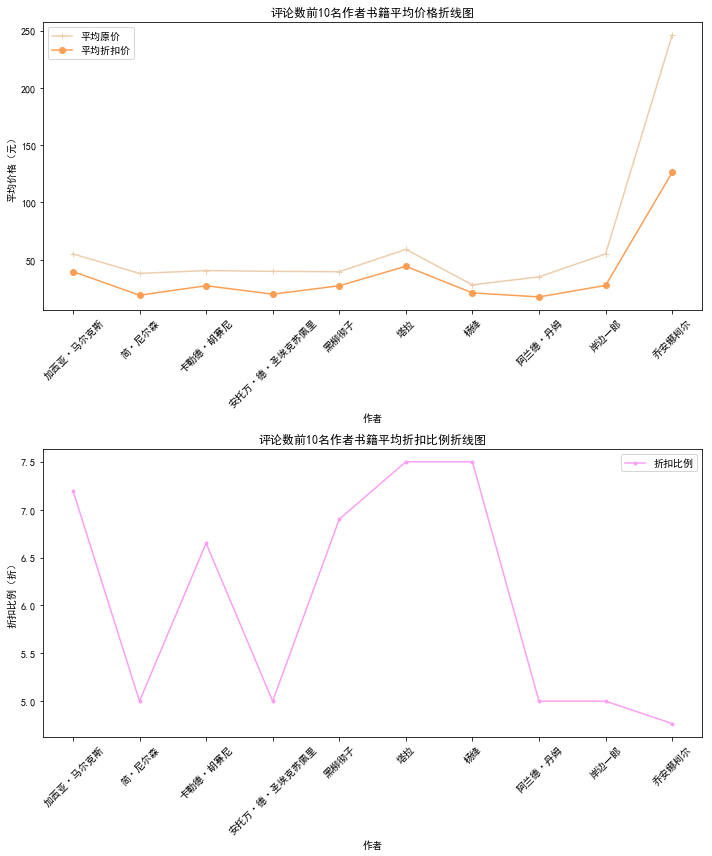

In [25]:
# 以作者分组，评论数前10名的书籍均值原价与书籍均值折扣价
author_price = book.groupby('作者')[['原价','折扣价','评论数']].mean().sort_values('评论数',ascending=False)[:10]
x = range(len(author_price))
fig,axs = plt.subplots(2,1,figsize=(10,12))

# 作者的平均原价和折扣价
axs[0].plot(x,author_price['原价'],label='平均原价',color="#ECCEAC",marker='+')
axs[0].plot(x,author_price['折扣价'],label='平均折扣价',color="#FC9F54",marker='o')
axs[0].set_xlabel('作者')
axs[0].set_ylabel('平均价格（元）')
axs[0].set_title('评论数前10名作者书籍平均价格折线图')
axs[0].set_xticks(x)
axs[0].set_xticklabels(author_price.index,rotation=45)
axs[0].legend()

# 以作者分组，评论数前10名的书籍均值折扣比例
author_discount = book.groupby('作者')[['折扣比例','评论数']].mean().sort_values('评论数',ascending=False)[:10]
# 作者的平均折扣比例
axs[1].plot(x,author_discount['折扣比例'],label='折扣比例',color="#FC9FF4",marker='.')
axs[1].set_xlabel('作者')
axs[1].set_ylabel('折扣比例（折）')
axs[1].set_title('评论数前10名作者书籍平均折扣比例折线图')
axs[1].set_xticks(x)
axs[1].set_xticklabels(author_discount.index,rotation=45)
axs[1].legend()

# 调整图表布局
plt.tight_layout()
plt.show()

从第一幅图浅色的原价和深色的折扣价可以发现：评论多的作者的书籍价格全部都有折扣，折扣的幅度大都位于一半之内，且绝大多数折扣后的价格也在50元以内，是否可以根据这一点推出大部分书籍价格也在50元以内呢？这点将在后面更深入研究。从第二幅图看，确实，有一半的热门作者的书籍折扣价格都达到了半折，符合前面的猜想。同时，最少也会给到7折多的折扣。

#### <a id='toc1_7_5_'></a>[3）最多评论总量的作者](#toc0_)

根据作者的评论总数来选出前10位最多评论总量的作者，并观察他们的评论总量。

Text(0.5,0,'作者')

Text(0,0.5,'评价总量（$10^7$）')

Text(0.5,1,'前10位最热门的作家评论总量的条形图')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1353b9fb8d0>,
 <a list of 7 Text yticklabel objects>)

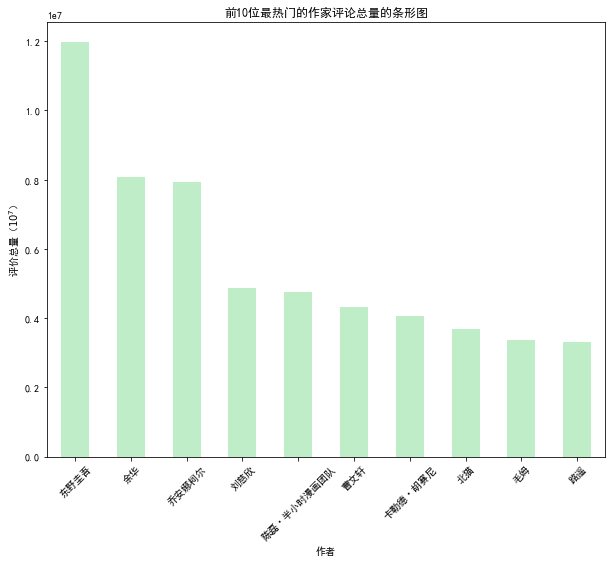

In [20]:
top_author=book.groupby("作者")["评论数"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,8))
top_author.plot(kind="bar",color="#BEEDC7")

plt.xlabel("作者")
plt.ylabel("评价总量（$10^7$）")
plt.title("前10位最热门的作家评论总量的条形图")
plt.xticks(rotation=45) 
plt.yticks([0,2000000,4000000,6000000,8000000,10000000,12000000])
plt.show() 

可以看出东野圭吾的评论热度碾压第二第三，其次是余华和乔安娜柯尔碾压之后的作者。

#### <a id='toc1_7_7_'></a>[4）最热门出版社推荐](#toc0_)

根据出版社的评论总数来选出热门的前10位出版社，以研究在相同书名的情况下，优先选择哪些出版社的书籍更合适。

Text(0.5,0,'出版社名称')

Text(0,0.5,'评价总量（$10^7$）')

Text(0.5,1,'热门出版社推荐条形图')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1353b983208>,
 <a list of 7 Text yticklabel objects>)

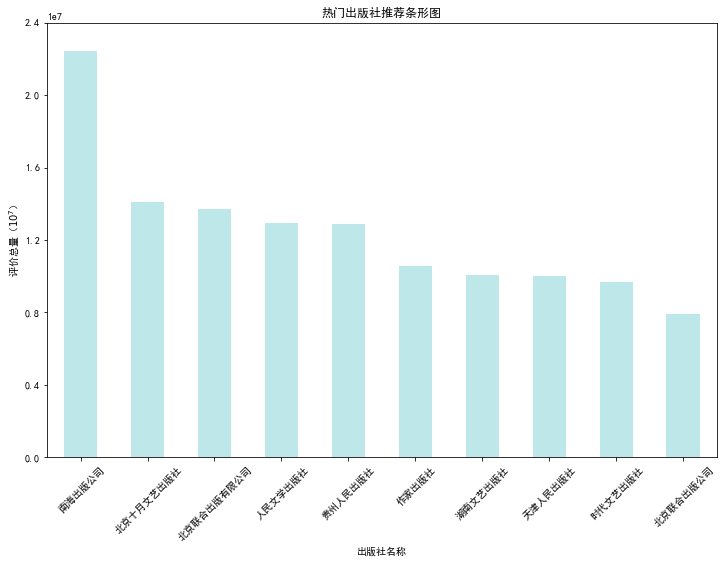

In [23]:
top_publisher=book.groupby("出版社")["评论数"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,8))
top_publisher.plot(kind="bar",color="#BEE7E9")

plt.xlabel("出版社名称")
plt.ylabel("评价总量（$10^7$）")
plt.title("热门出版社推荐条形图")
plt.xticks(rotation=45)
plt.yticks([i for i in range(0,24000001,4000000)])
plt.show()   

可以发现，南海出版公司以碾压的形势夺取了第一，其次第二至第五名为一个级别，第六到第十名又是一个级别。这样的话，以后找一本书，如果书单里不同的出版社里有南海出版公司的话，我会优先选择。

### <a id='toc1_8_'></a>[3.单个特征分析](#toc0_)

#### <a id='toc1_8_1_'></a>[1）书籍价格及折扣比例分布情况](#toc0_)
基于前面的热门作家书籍的价格情况，下面来查看所有书籍价格的分布情况，看是否与前面的结论一致。

(array([863., 131.,  50.,  23.,   7.,   6.,   2.,   2.,   3.,   1.,   2.,
          1.,   1.,   0.,   2.]),
 array([ 14.8       ,  69.01333333, 123.22666667, 177.44      ,
        231.65333333, 285.86666667, 340.08      , 394.29333333,
        448.50666667, 502.72      , 556.93333333, 611.14666667,
        665.36      , 719.57333333, 773.78666667, 828.        ]),
 <a list of 15 Patch objects>)

Text(0.5,1,'书籍原价分布情况直方图')

Text(0.5,0,'原价（元）')

Text(0,0.5,'频数')

([<matplotlib.axis.XTick at 0x13549bf6198>,
 <a list of 18 Text xticklabel objects>)

(array([689., 288.,  73.,  15.,   8.,   8.,   2.,   1.,   1.,   4.,   0.,
          2.,   1.,   1.,   1.]),
 array([  2.1 ,  32.32,  62.54,  92.76, 122.98, 153.2 , 183.42, 213.64,
        243.86, 274.08, 304.3 , 334.52, 364.74, 394.96, 425.18, 455.4 ]),
 <a list of 15 Patch objects>)

Text(0.5,1,'书籍折扣价分布情况直方图')

Text(0.5,0,'折扣价（元）')

Text(0,0.5,'频数')

([<matplotlib.axis.XTick at 0x13549c01908>,
 <a list of 11 Text xticklabel objects>)

(array([ 10.,   9.,  10.,  13.,  19., 153., 494.,  34.,  49.,  63.,  87.,
        128.,  13.,   6.,   6.]),
 array([0.8       , 1.40666667, 2.01333333, 2.62      , 3.22666667,
        3.83333333, 4.44      , 5.04666667, 5.65333333, 6.26      ,
        6.86666667, 7.47333333, 8.08      , 8.68666667, 9.29333333,
        9.9       ]),
 <a list of 15 Patch objects>)

Text(0.5,1,'书籍折扣比例分布情况直方图')

Text(0.5,0,'折扣比例（折）')

Text(0,0.5,'频数')

([<matplotlib.axis.XTick at 0x13549c4db70>,
 <a list of 10 Text xticklabel objects>)

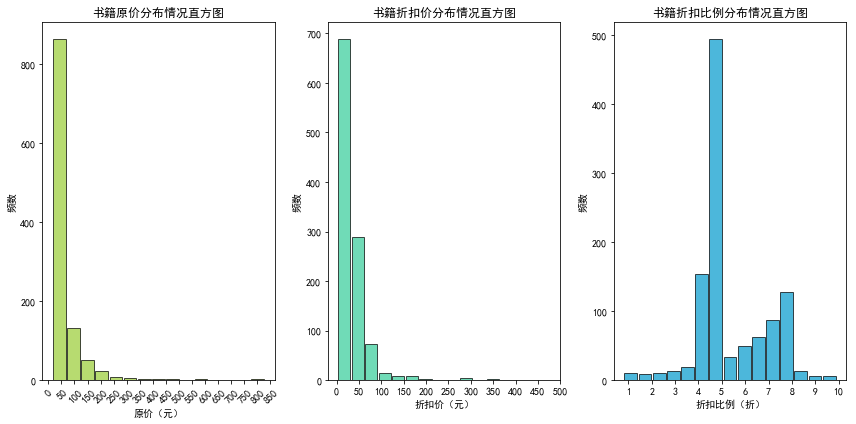

In [70]:
plt.figure(figsize=(12, 6))

# 原价分布
plt.subplot(1, 3, 1)
plt.hist(book['原价'], bins=15, edgecolor='black', alpha=0.7,rwidth=0.9,color=["#99CC33"])
plt.title('书籍原价分布情况直方图')
plt.xlabel('原价（元）')
plt.ylabel('频数')
plt.xticks(range(0, int(max(book['原价'])) + 50, 50),rotation=45)

# 折扣价分布
plt.subplot(1, 3, 2)
plt.hist(book['折扣价'], bins=15, edgecolor='black', alpha=0.7,rwidth=0.9,color=["#33CC99"])
plt.title('书籍折扣价分布情况直方图')
plt.xlabel('折扣价（元）')
plt.ylabel('频数')
plt.xticks(range(0, int(max(book['折扣价'])) + 50, 50))

# 折扣比例分布
plt.subplot(1, 3, 3)
plt.hist(book['折扣比例'], bins=15, edgecolor='black', alpha=0.7,rwidth=0.9,color=["#0099CC"])
plt.title('书籍折扣比例分布情况直方图')
plt.xlabel('折扣比例（折）')
plt.ylabel('频数')
plt.xticks(range(1, 11))

plt.tight_layout()
plt.show()

果然，绝大部分书籍都在50元之内，而不仅仅是热门的作家。同样，折扣的比例也绝大部份是半折左右，也证明了出版社的营销策略：出版时先高价出售，先采取高盈利低销量的策略，而后采取折扣优惠，吸引读者购买，此时为高销量低盈利的策略。

([<matplotlib.patches.Wedge at 0x13549bb8c18>,
 [Text(-0.392336,1.02765,'0-50元'),
  Text(-0.00631775,-1.09998,'51-100元'),
  Text(0.935337,-0.578918,'101-150元'),
  Text(1.061,-0.290291,'151-200元'),
  Text(1.09619,-0.0915002,'200元以上')],
 [Text(-0.214002,0.560538,'61.6%'),
  Text(-0.00344604,-0.59999,'26.6%'),
  Text(0.510184,-0.315773,'5.9%'),
  Text(0.57873,-0.158341,'3.2%'),
  Text(0.597921,-0.0499092,'2.7%')])

Text(0.5,1,'书籍原价区间分布情况饼图')

(-1.1104943860691863,
 1.1004997326699613,
 -1.1014344601288397,
 1.1128246293723822)

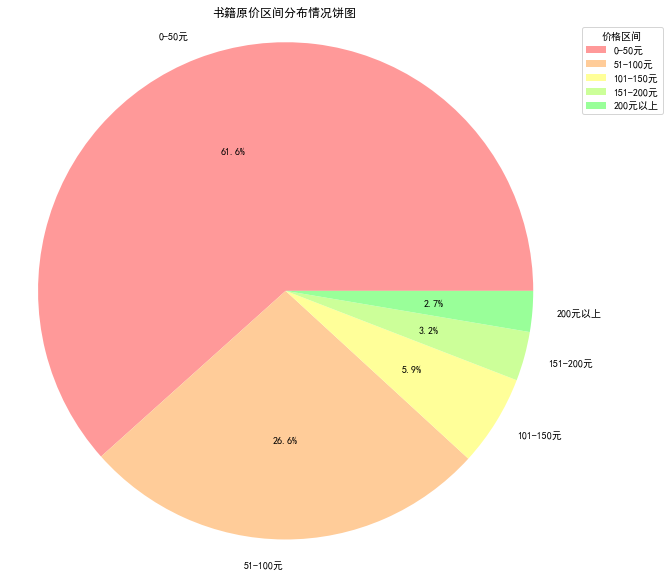

In [69]:
#书籍原价区间分布情况饼图
# 定义价格区间
price_ranges = [0, 50, 100, 150, 200,  np.inf]
labels = ['0-50元', '51-100元', '101-150元', '151-200元', '200元以上']
# 计算每个价格区间内的书籍数量
price_counts = pd.cut(book['原价'],bins=price_ranges,labels=labels,include_lowest=True).value_counts()

plt.figure(figsize=(8, 8))  
plt.pie(price_counts,labels=labels,autopct='%1.1f%%',startangle=0,colors=['#FF9999', '#FFCC99', '#FFFF99', '#CCFF99', '#99FF99'])  

plt.title('书籍原价区间分布情况饼图')
plt.axis('equal')  # 使饼图呈圆形
plt.legend(title='价格区间', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

确确实实，绝大部分书籍即使没有折扣，也可以在50元的价格内买下。其次是集中在51元到100元之间。少数书籍原价高于200元。

#### <a id='toc1_8_2_'></a>[2）书籍推荐值的分布情况](#toc0_)

众所周知，能上榜的书籍都应该是高推荐的书籍，果真如此吗？我将采用箱线图来证明。

{'boxes': [<matplotlib.patches.PathPatch at 0x1353ee59550>],
 'caps': [<matplotlib.lines.Line2D at 0x1353ee59da0>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x1353ee5da90>],
 'medians': [<matplotlib.lines.Line2D at 0x1353ee5d630>],
 'whiskers': [<matplotlib.lines.Line2D at 0x1353ee597b8>,
  <matplotlib.lines.Line2D at 0x1353ee59908>]}

Text(0.5,0,'推荐值(%)')

Text(0.5,1,'书籍推荐值分布情况箱型图')

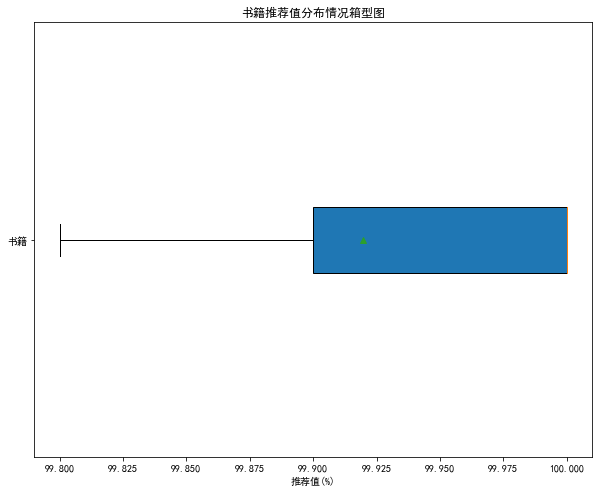

In [30]:
plt.figure(figsize=(10, 8))
plt.boxplot(book["推荐值"], labels=['书籍'],vert=False, patch_artist=True, showmeans=True, showfliers=False)

plt.xlabel("推荐值(%)")
plt.title("书籍推荐值分布情况箱型图")
plt.show()

意料之中，能上TOP榜单的书籍的推荐值都必然是最高的。

#### <a id='toc1_8_3_'></a>[3）书籍评论数的分布情况](#toc0_)

调查书籍评论数的大致区间。

Text(0.5,1,'书籍评论数分布情况小提琴图')

Text(0.5,0,'评论数')

Text(0,0.5,'书籍')

([<matplotlib.axis.XTick at 0x1354953e390>,
 <a list of 16 Text xticklabel objects>)

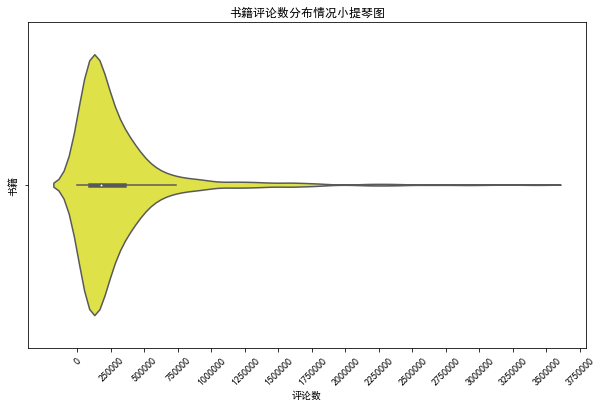

In [68]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='评论数', data=book,color="#F7FA2E")

plt.title('书籍评论数分布情况小提琴图')
plt.xlabel('评论数')
plt.ylabel('书籍')
plt.xticks([i for i in range(0, 4000000, 250000)],rotation=45)
plt.show()

可以看出评论数集中在0-500000之间，真正多评论的还是不多的。

#### <a id='toc1_8_4_'></a>[4）书籍出版年份的分布情况](#toc0_)

下面通过直方图来具体了解出版年份对应的出版书籍数量有多少。后面会绘制出版年份与上榜书籍的关系图，以发现上榜书籍与出版年份的特征关系。

(array([  1.,   0.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          3.,  10.,   9.,  12.,  40.,  81., 181., 301., 303., 151.]),
 array([1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998, 2000, 2002,
        2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, 2022, 2024]),
 <a list of 21 Patch objects>)

Text(0.5,1,'图书出版年份分布情况直方图')

Text(0.5,0,'出版年份')

Text(0,0.5,'书籍数量')

([<matplotlib.axis.XTick at 0x1354a03d588>,
 <a list of 22 Text xticklabel objects>)

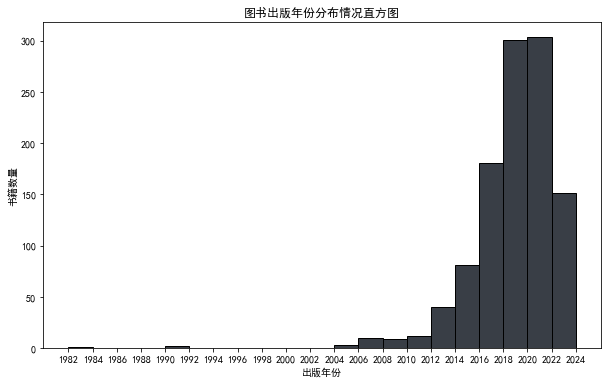

In [71]:
# 提取所有出版日期的年份
book['出版年份'] = pd.to_datetime(book['出版日期']).dt.year

plt.figure(figsize=(10, 6))
plt.hist(book['出版年份'], bins=range(book['出版年份'].min(), book['出版年份'].max() + 2,2), edgecolor='black',color="#393e46")

plt.title('图书出版年份分布情况直方图')
plt.xlabel('出版年份')
plt.ylabel('书籍数量')
plt.xticks(range(book['出版年份'].min(), book['出版年份'].max() + 2,2))
plt.show()

看来出版优秀书籍（上榜书籍）数量最多的年份是2018年-2022年区间这四年。

#### <a id='toc1_7_6_'></a>[5）书籍上榜分布情况](#toc0_)

统计不同上榜次数的书籍数量，研究上榜书籍存在多次上榜的情况有多少。

Text(1,568,'568个')

Text(2,269,'269个')

Text(3,137,'137个')

Text(4,120,'120个')

Text(0.5,1,'书籍上榜次数分布情况折线图')

Text(0.5,0,'上榜次数')

Text(0,0.5,'书籍数量')

([<matplotlib.axis.XTick at 0x1354b04aa58>,
 <a list of 4 Text xticklabel objects>)

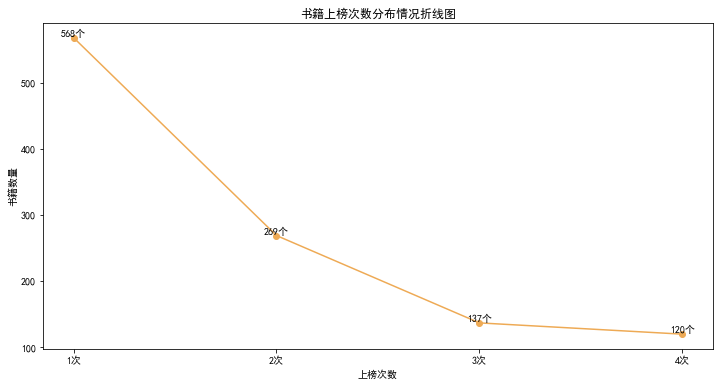

In [72]:
count_data = book['上榜次数'].value_counts()

plt.figure(figsize=(12, 6))
plt.plot(count_data.index, count_data.values, marker='o',color="#EEAA55")

# 添加标签
for x, y in zip(count_data.index, count_data.values):
    plt.text(x, y, f'{y}个', ha='center', va='bottom')

plt.title('书籍上榜次数分布情况折线图')
plt.xlabel('上榜次数')
plt.ylabel('书籍数量')
plt.xticks(range(1, 5), [str(i)+"次" for i in range(1,5)])
plt.show()

大多数书籍只上榜过一次，可能只是短期内热门的书籍，经不住时间的考验。能够保持3次及以上上榜的书籍，都是非常经典的世界著作了。也就是说，至少有257（上榜3次加上上榜4次）本书是属于必看类型的，看来我的书单又要添加进新书籍咯。

### <a id='toc1_9_'></a>[4.特征间关系分析](#toc0_)

#### <a id='toc1_9_1_'></a>[1）书籍排名与书籍评论数的关系](#toc0_)

前面了解到评论数集中在0-500000之间，下面看一下各年排名前10的书籍的评论数是否会超过这个大多数的评论区间，以此判断排名靠前的书籍评论是否会更多，也就是书籍排名与书籍评论数之间的关系。

array(['你当像鸟飞往你的山（中文版销量超200万册，比尔·盖茨年度特别推',
       '人间失格（日本小说家太宰治代表作，一个对村上春树影响至深的绝',
       '乌合之众 : 大众心理研究（群体心理学创始人古斯塔夫·勒庞代表作', '神奇校车·图画书版（全12册）',
       '作家榜名著：月亮与六便士（159万+读者高分推荐版！好评率高达99',
       '人生海海（麦家重磅力作，莫言、董卿盛赞，连续两年高居畅销榜，', '正面管教(修订版)',
       '云边有个小卖部（俞敏洪《在岁月中远行》单独撰文推荐，随书附赠', '小熊和最好的爸爸（全7册）',
       '啊2.0（大冰作品！狂销100万册！新增10万字并包含旧书全文。）',
       '蛤蟆先生去看心理医生（热销300万册！英国经典心理咨询入门书，知', '少年读史记（套装全5册）',
       '医路向前巍子给中国人的救护指南', '马尔克斯：百年孤独（50周年纪念版）',
       '文城（余华新书，时隔8年重磅归来，《活着》之后又一精彩力作）', '东野圭吾：白夜行（易烊千玺、孟非推荐，东野圭吾作品无冕之王）',
       '生死疲劳（不看不知道，莫言真幽默！全新版本！）', '被讨厌的勇气：“自我启发之父”阿德勒的哲学课 岸见一郎',
       '活着（余华代表作，精装，易烊千玺推荐阅读）', '三体：全三册 刘慈欣代表作，亚洲“雨果奖”获奖作品！',
       '保重（大冰小蓝书系列收官之作！就此别过，诸君保重。当当专享语', '次第花开 修订版',
       '杀死一只知更鸟（豆瓣9.2，关于勇气与正义的成长教科书，影响全球',
       '我与地坛（纪念版）（2024年百班千人寒假书单 九年级推荐阅读）',
       '你也走了很远的路吧（新增2万余字，4篇文章，关于特殊时期成长的', '额尔古纳河右岸（茅盾文学奖获奖作品全集28）',
       '带壳的牡蛎是大人的心脏（当当专享签章版+作者亲绘贴纸。火爆全网', '长安的荔枝',
       '真希望你也喜欢自己（销量超过140万册！房琪shou部图书作品，写给'], dtype=object)

Text(0.5,1,'2020年排行前10的书籍及评论数条形图')

Text(0.5,0,'评论数')

Text(0,0.5,'书名')

Text(0.5,1,'2021年排行前10的书籍及评论数条形图')

Text(0.5,0,'评论数')

Text(0,0.5,'书名')

Text(0.5,1,'2022年排行前10的书籍及评论数条形图')

Text(0.5,0,'评论数')

Text(0,0.5,'书名')

Text(0.5,1,'2023年排行前10的书籍及评论数条形图')

Text(0.5,0,'评论数')

Text(0,0.5,'书名')

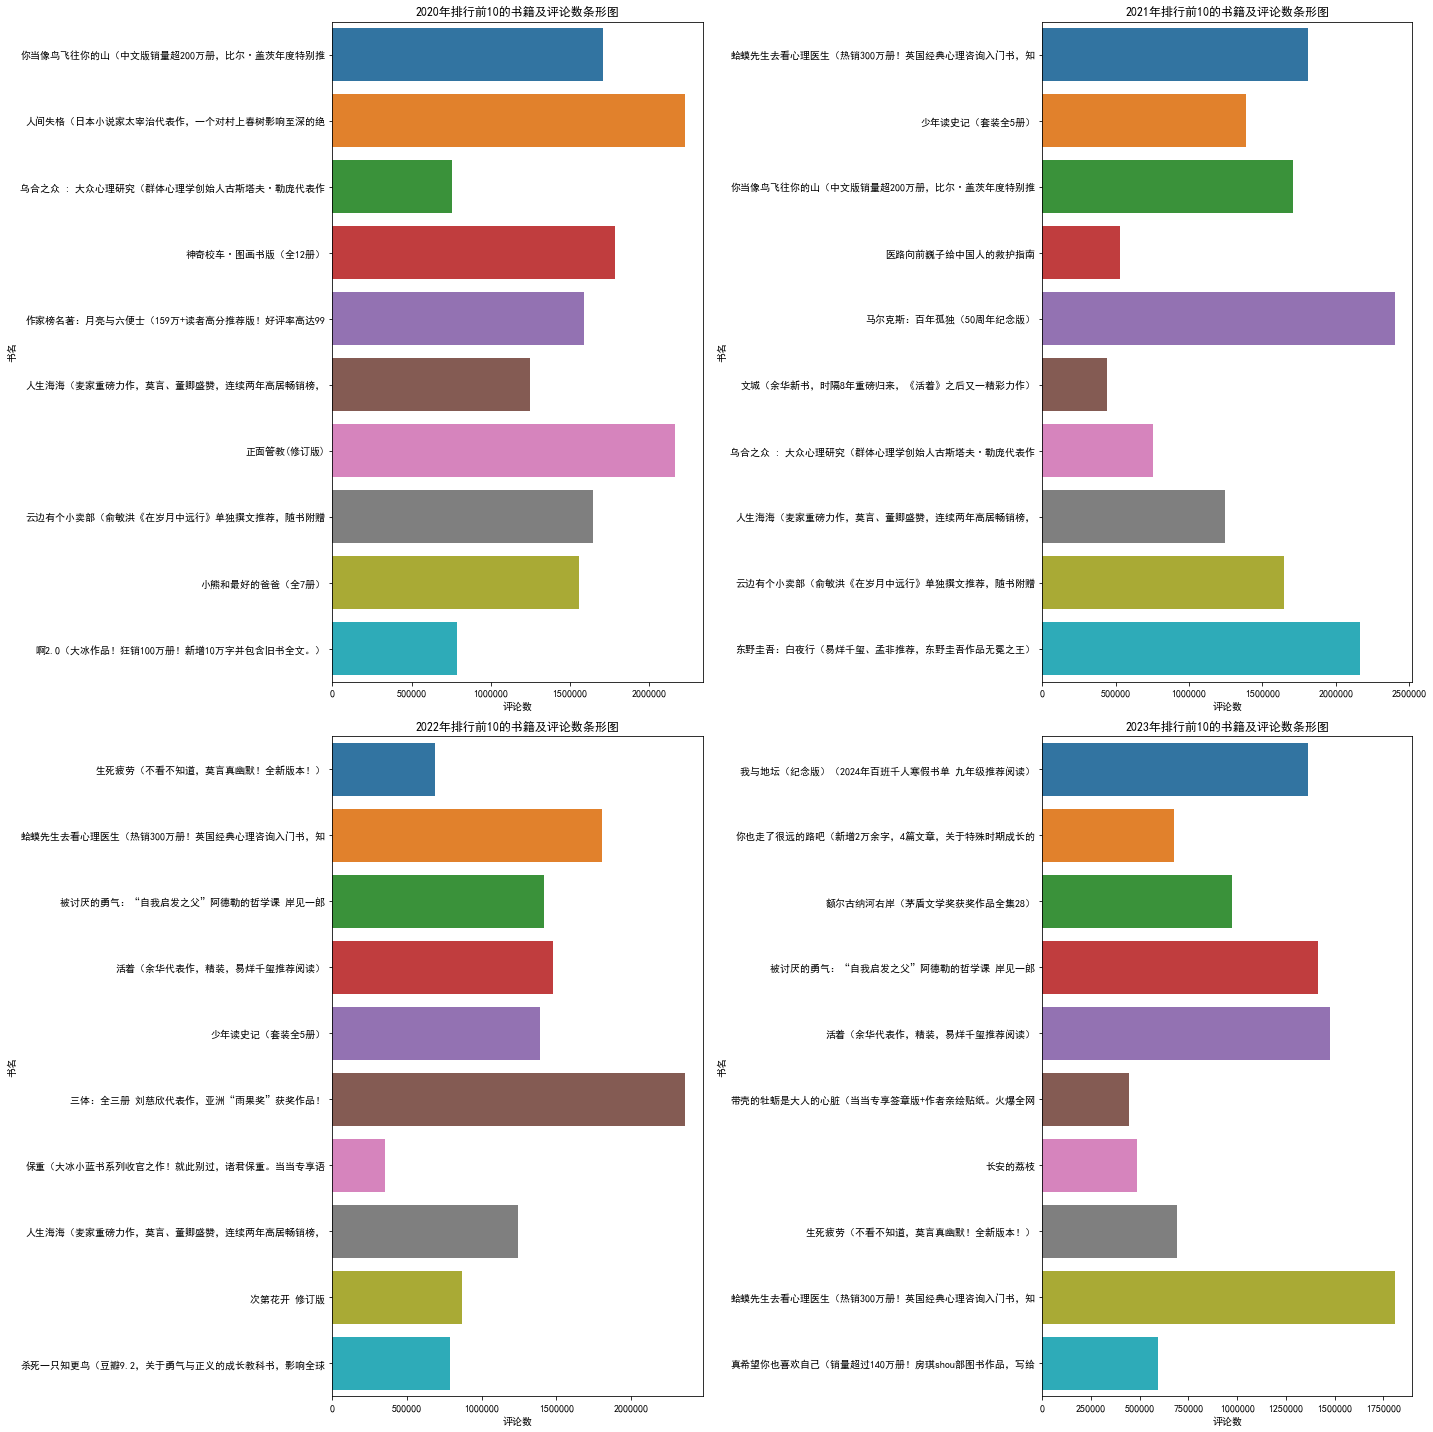

In [73]:
# 确保排名列为数值类型，将原本的未上榜换成500，这样也不会对前10有影响
for year in [2020, 2021, 2022, 2023]:
    book[year] = pd.to_numeric(book[str(year) + '排名'].replace('未上榜', 500), errors='coerce')

# 获取每年排名前10的书籍
top_2020 = book.nsmallest(10, 2020)
top_2021 = book.nsmallest(10, 2021)
top_2022 = book.nsmallest(10, 2022)
top_2023 = book.nsmallest(10, 2023)

# 获取这四个合并后的唯一值
pd.concat([top_2020, top_2021, top_2022, top_2023])['书名'].unique()
# len(pd.concat([top_2020, top_2021, top_2022, top_2023])['书名'].unique())

# 绘制每年排名前10的书籍及评论数
plt.figure(figsize=(20,20))
# 2020年
plt.subplot(2, 2, 1)
sns.barplot(x='评论数', y='书名', data=top_2020) #图像可以双击放大
plt.title('2020年排行前10的书籍及评论数条形图')
plt.xlabel('评论数')
plt.ylabel('书名')

# 2021年
plt.subplot(2, 2, 2)
sns.barplot(x='评论数', y='书名', data=top_2021)#图像可以双击放大
plt.title('2021年排行前10的书籍及评论数条形图')
plt.xlabel('评论数')
plt.ylabel('书名')

# 2022年
plt.subplot(2, 2, 3)
sns.barplot(x='评论数', y='书名', data=top_2022)#图像可以双击放大
plt.title('2022年排行前10的书籍及评论数条形图')
plt.xlabel('评论数')
plt.ylabel('书名')

# 2023年
plt.subplot(2, 2, 4)
sns.barplot(x='评论数', y='书名', data=top_2023)#图像可以双击放大
plt.title('2023年排行前10的书籍及评论数条形图')
plt.xlabel('评论数')
plt.ylabel('书名')

plt.tight_layout()
plt.show()

- 完美的展示了这四年排名前十的书籍及评论数。调查发现这些书的评论绝大多数都超出了前面50万条的评论，果然是高排名书籍的特性。并没有明显的书籍排名随书籍评论数正相关的关系。  
- 这四年中进了前10榜的作品包括：《你当像鸟飞往你的山》、《乌合之众》、《月亮与六便士》、《人生海海》、《云边有个小卖部》、《啊2.0》、《蛤蟆先生去看心理医生》、《医路向前巍子给中国人的救护指南》、《文城》、《生死疲劳》、《活着》、《保重》、《杀死一只知更鸟》、《我与地坛（纪念版）》、《你也走了很远的路吧》、《神奇校车·图画书版（全12册）》、《正面管教(修订版)》、《小熊和最好的爸爸（全7册）》、《少年读史记（套装全5册）》、《马尔克斯：百年孤独（50周年纪念版）》、《白夜行》、《被讨厌的勇气》、《三体：全三册》、《次第花开 修订版》、《额尔古纳河右岸》、《长安的荔枝》、《带壳的牡蛎是大人的心脏》和《真希望你也喜欢自己》共29本。接下来又有新书看哩。当然，评论多不代表的是全是好的评价，就怕全是差评的高数量的评价，需要进一步的分析，要带上推荐值更具体。

#### <a id='toc1_9_2_'></a>[2）书籍评论数与推荐值的关系](#toc0_)

一般来说，书籍评论数和推荐值存在一定的正相关关系: 即评论数越多，推荐值越高。下面通过散点图来观察是否有该正相关的特性。

Text(0.5,1,'书籍评论数与推荐值关系散点图')

Text(0.5,0,'评论数')

Text(0,0.5,'推荐值(%)')

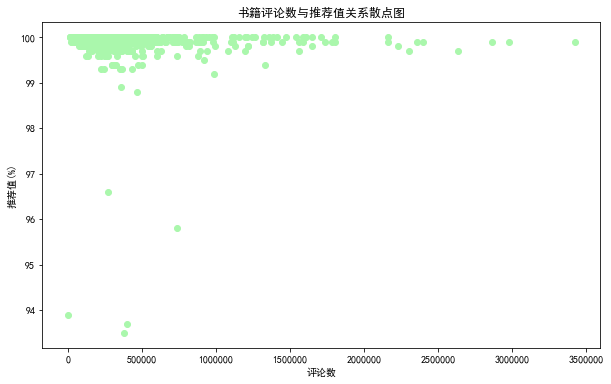

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(x=book['评论数'], y=book["推荐值"],color="#AAF7AC")
plt.title('书籍评论数与推荐值关系散点图')
plt.xlabel('评论数')
plt.ylabel('推荐值(%)')
plt.show()

我们可以了解到：
- 评论数不是影响推荐值的重要因素: 评论数越多，书籍的推荐值并不会越高，这说明用户对书籍的评价对推荐值没有显著的影响，也说明推荐值可能还受到其他因素的影响，例如书籍的质量、主题、作者等。
- 图中存在一些离散点，即评论数较少(对比这幅图来说)推荐值却不高的书籍，因为这幅图是评论数少，书籍推荐值反而更高。

#### <a id='toc1_9_4_'></a>[3）书籍折扣比例与评论数的关系](#toc0_)

书籍折扣比例与评论数之间的关系可能是非线性的：这意味着在一定范围内，折扣比例越低（越便宜），评论数越多，但超过某个临界点后，评论数的增长速度可能放缓，甚至出现下降。下面通过散点图来说明这个情况。

Text(0.5,1,'书籍折扣比例与评论数关系散点图')

Text(0.5,0,'折扣比例（折）')

Text(0,0.5,'评论数')

([<matplotlib.axis.XTick at 0x266c18d97b8>,
 <a list of 11 Text xticklabel objects>)

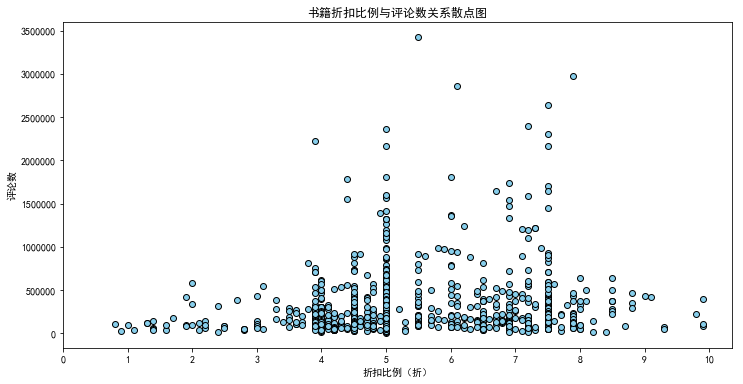

In [49]:
plt.figure(figsize=(12, 6))
plt.scatter(x='折扣比例', y='评论数', data=book,color='skyblue', edgecolor='black')
plt.title('书籍折扣比例与评论数关系散点图')
plt.xlabel('折扣比例（折）')
plt.ylabel('评论数')
plt.xticks(range(11))
plt.show()

很显然，评论数较多的书籍只会出现在折扣幅度在3折至9折其间，而大部分书籍还都是100万内的评论数，分布也集中在3-9折。

#### <a id='toc1_7_9_'></a>[4）书籍出版年份与评论数的关系](#toc0_)

群众普遍的认为，书籍越新评论数越高，毕竟，大众大都不会选择较老的书籍。下面通过折线图来说明这一点。

Text(0.5,0,'出版年份')

Text(0,0.5,'评论数')

Text(0.5,1,'书籍出版年份与评论数之间的关系折线图')

([<matplotlib.axis.XTick at 0x13539622b70>,
 <a list of 23 Text xticklabel objects>)

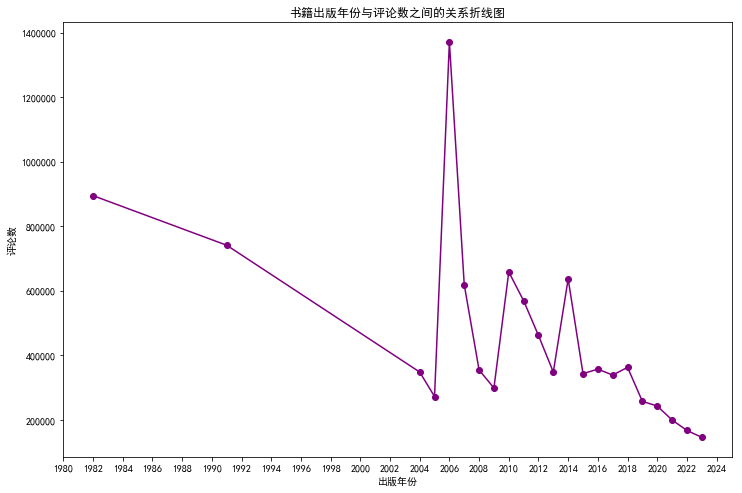

In [12]:
# 计算每个出版年份的评论数均值
year_comments = book.groupby('出版年份')['评论数'].mean().reset_index()

plt.figure(figsize=(12, 8))
plt.plot(year_comments['出版年份'], year_comments['评论数'], color='purple', marker='o', linestyle='-')

plt.xlabel('出版年份')
plt.ylabel('评论数')
plt.title('书籍出版年份与评论数之间的关系折线图')
plt.xticks(range(1980,2025,2))
plt.show()

该图较难看出很明显的趋势，但是最近出版的书籍却是在走下坡路，可能是新出版的没有老的出来那么多时间以积累更多的评论。而巅峰评论时期是在2006年左右，最近5年反而是评论均值的谷底。

#### <a id='toc1_9_3_'></a>[5）书籍出版年份及原价的关系](#toc0_)

目的在于研究书籍原价随时间的变化趋势。

<Container object of 22 artists>

Text(0.5,0,'出版年份')

Text(0,0.5,'平均原价')

Text(0.5,1,'平均原价随书籍出版年份的变化条形图')

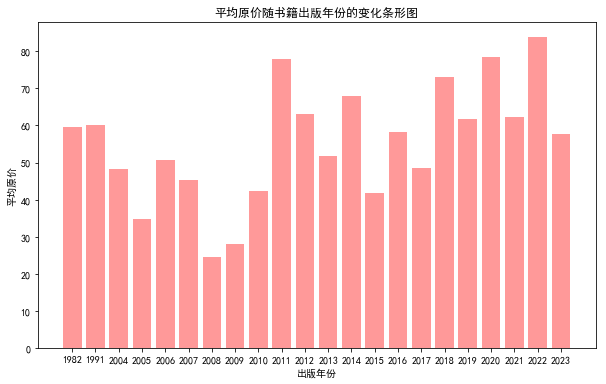

In [13]:
# 每个出版年份的书籍原价均值
avg_price = book.groupby('出版年份')['原价'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_price['出版年份'].astype(str), avg_price['原价'], color='#FF9999')

plt.xlabel('出版年份')
plt.ylabel('平均原价')
plt.title('平均原价随书籍出版年份的变化条形图')
plt.show()

从图中可以看出，书籍平均原价变化多端，起伏不定。在奇数年如2017、2019和2021都比对应的偶数年如2018、2020和2022年的原价要低。或许我们适合在奇数年购买书籍，因为有趋向表面，会更便宜，可以尝试一下。但注意这一点不是绝对的。

### <a id='toc1_10_'></a>[5.探索性数据分析](#toc0_)
#### <a id='toc1_10_1_'></a>[1）查看书籍上榜数量最多的作者](#toc0_)
出于好奇，查看一下书籍上榜数量最多的前10位作者，当然也可以了解到哪些作者的作品容易上榜，可以优先选择这些作者。

<Container object of 10 artists>

Text(0.5,1,'上榜作品数量最多的10位作者条形图')

Text(0.5,0,'上榜书籍数量')

Text(0,0.5,'作者')

([<matplotlib.axis.XTick at 0x266c18f8860>,
 <a list of 7 Text xticklabel objects>)

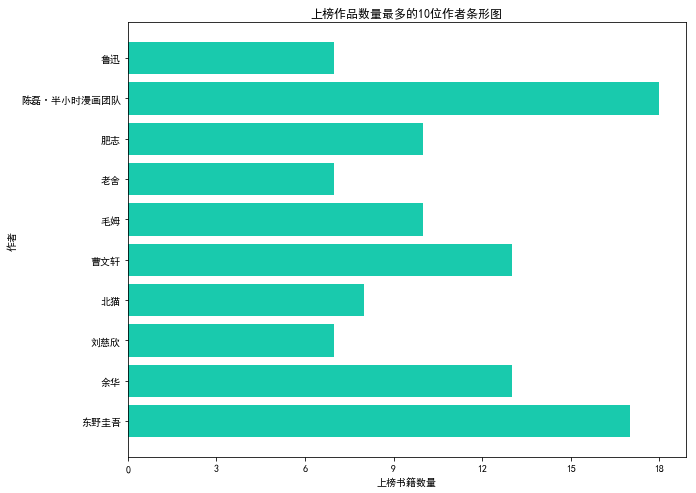

In [48]:
top_publish = book['作者'].value_counts().head(10)

plt.figure(figsize=(10, 8))
plt.barh(top_publish.index, top_publish.values,color="#19CAAD")

plt.title('上榜作品数量最多的10位作者条形图')
plt.xlabel('上榜书籍数量')
plt.ylabel('作者')
plt.xticks(range(0,19,3))
plt.show()

可以看出，陈磊·半小时漫画团队是上榜书籍最多的作者，其次是东野圭吾，再后就是曹文轩、余华、毛姆和刘慈欣。结合前面的关于作者的分析，综合分析出最热门且作品最优秀的几位作者：东野圭吾、曹文轩、余华、毛姆和刘慈欣。

#### <a id='toc1_7_4_'></a>[2）折扣价最高的书籍](#toc0_)

检验能上榜的书籍的折扣价最高能到何种地步，同时，是读者能承担起的价格。

<Container object of 10 artists>

Text(0.5,0,'书籍名称')

Text(0,0.5,'折扣价（元）')

Text(0.5,1,'折扣价最高的前10本书籍条形图')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

([<matplotlib.axis.YTick at 0x1353c5a4e48>,
 <a list of 11 Text yticklabel objects>)

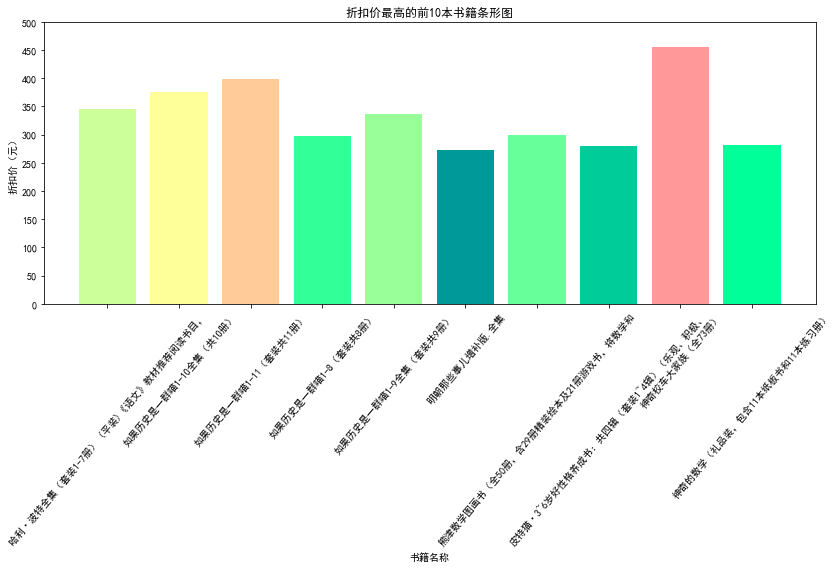

In [38]:
# 找到折扣价最高的前10本书籍
top_price = book.sort_values('折扣价',ascending=False).head(10)

# 绘制条形图
plt.figure(figsize=(12,8))  
plt.bar(top_price['书名'].values,top_price['折扣价'].values,color=['#FF9999','#FFCC99','#FFFF99','#CCFF99','#99FF99','#66FF99','#33FF99','#00FF99','#00CC99','#009999'])  

plt.xlabel('书籍名称')
plt.ylabel('折扣价（元）')
plt.title('折扣价最高的前10本书籍条形图')
plt.xticks(rotation=50)  
plt.yticks(np.arange(0,max(top_price['折扣价']) + 50,50))  
plt.tight_layout()  
plt.show()

价格最高的10本图书最少都要250元左右，同时这些书籍要么是一整套包含很多本书的，要么就是精装限量版或收藏版书籍。

#### <a id='toc1_7_8_'></a>[3）各个出版社出版的书籍数量](#toc0_)

亦在了解哪些出版社比较能出版书籍。

Text(54,58,'54本')

Text(40,108,'40本')

Text(36,12,'36本')

Text(36,66,'36本')

Text(33,65,'33本')

Text(33,43,'33本')

Text(31,132,'31本')

Text(29,50,'29本')

Text(29,118,'29本')

Text(29,144,'29本')

Text(25,105,'25本')

Text(22,46,'22本')

Text(21,163,'21本')

Text(21,57,'21本')

Text(20,174,'20本')

Text(19,83,'19本')

Text(18,87,'18本')

Text(18,134,'18本')

Text(18,109,'18本')

Text(17,72,'17本')

Text(17,114,'17本')

Text(17,102,'17本')

Text(16,53,'16本')

Text(16,138,'16本')

Text(14,42,'14本')

Text(13,136,'13本')

Text(13,20,'13本')

Text(12,112,'12本')

Text(11,68,'11本')

Text(10,133,'10本')

Text(10,95,'10本')

Text(10,45,'10本')

Text(9,128,'9本')

Text(9,38,'9本')

Text(9,9,'9本')

Text(9,170,'9本')

Text(8,41,'8本')

Text(8,126,'8本')

Text(8,131,'8本')

Text(8,76,'8本')

Text(8,74,'8本')

Text(8,34,'8本')

Text(7,56,'7本')

Text(7,77,'7本')

Text(7,171,'7本')

Text(6,161,'6本')

Text(6,166,'6本')

Text(6,121,'6本')

Text(6,7,'6本')

Text(6,27,'6本')

Text(5,103,'5本')

Text(5,153,'5本')

Text(5,52,'5本')

Text(5,24,'5本')

Text(5,2,'5本')

Text(5,67,'5本')

Text(5,175,'5本')

Text(5,94,'5本')

Text(5,14,'5本')

Text(5,115,'5本')

Text(5,21,'5本')

Text(4,48,'4本')

Text(4,4,'4本')

Text(4,78,'4本')

Text(4,158,'4本')

Text(4,168,'4本')

Text(3,62,'3本')

Text(3,142,'3本')

Text(3,55,'3本')

Text(3,3,'3本')

Text(3,18,'3本')

Text(3,84,'3本')

Text(3,82,'3本')

Text(3,1,'3本')

Text(3,99,'3本')

Text(3,154,'3本')

Text(3,107,'3本')

Text(3,36,'3本')

Text(3,149,'3本')

Text(3,54,'3本')

Text(3,32,'3本')

Text(3,110,'3本')

Text(3,160,'3本')

Text(3,30,'3本')

Text(2,96,'2本')

Text(2,71,'2本')

Text(2,104,'2本')

Text(2,15,'2本')

Text(2,22,'2本')

Text(2,44,'2本')

Text(2,8,'2本')

Text(2,0,'2本')

Text(2,60,'2本')

Text(2,86,'2本')

Text(2,75,'2本')

Text(2,98,'2本')

Text(2,88,'2本')

Text(2,29,'2本')

Text(2,31,'2本')

Text(2,164,'2本')

Text(2,139,'2本')

Text(2,23,'2本')

Text(2,122,'2本')

Text(2,80,'2本')

Text(2,39,'2本')

Text(2,11,'2本')

Text(2,135,'2本')

Text(2,123,'2本')

Text(2,169,'2本')

Text(2,145,'2本')

Text(2,61,'2本')

Text(2,10,'2本')

Text(2,111,'2本')

Text(2,49,'2本')

Text(1,19,'1本')

Text(1,17,'1本')

Text(1,143,'1本')

Text(1,51,'1本')

Text(1,162,'1本')

Text(1,101,'1本')

Text(1,124,'1本')

Text(1,129,'1本')

Text(1,167,'1本')

Text(1,146,'1本')

Text(1,152,'1本')

Text(1,155,'1本')

Text(1,141,'1本')

Text(1,5,'1本')

Text(1,172,'1本')

Text(1,25,'1本')

Text(1,117,'1本')

Text(1,165,'1本')

Text(1,85,'1本')

Text(1,16,'1本')

Text(1,100,'1本')

Text(1,26,'1本')

Text(1,90,'1本')

Text(1,156,'1本')

Text(1,70,'1本')

Text(1,73,'1本')

Text(1,64,'1本')

Text(1,116,'1本')

Text(1,91,'1本')

Text(1,120,'1本')

Text(1,106,'1本')

Text(1,140,'1本')

Text(1,159,'1本')

Text(1,89,'1本')

Text(1,150,'1本')

Text(1,125,'1本')

Text(1,127,'1本')

Text(1,113,'1本')

Text(1,137,'1本')

Text(1,47,'1本')

Text(1,119,'1本')

Text(1,157,'1本')

Text(1,28,'1本')

Text(1,148,'1本')

Text(1,40,'1本')

Text(1,173,'1本')

Text(1,130,'1本')

Text(1,97,'1本')

Text(1,79,'1本')

Text(1,69,'1本')

Text(1,6,'1本')

Text(1,147,'1本')

Text(1,37,'1本')

Text(1,92,'1本')

Text(1,35,'1本')

Text(1,13,'1本')

Text(1,33,'1本')

Text(1,93,'1本')

Text(1,81,'1本')

Text(1,63,'1本')

Text(1,151,'1本')

Text(1,59,'1本')

Text(0.5,0,'书籍数量')

Text(0,0.5,'出版社')

Text(0.5,1,'各个出版社书籍数量条形图')

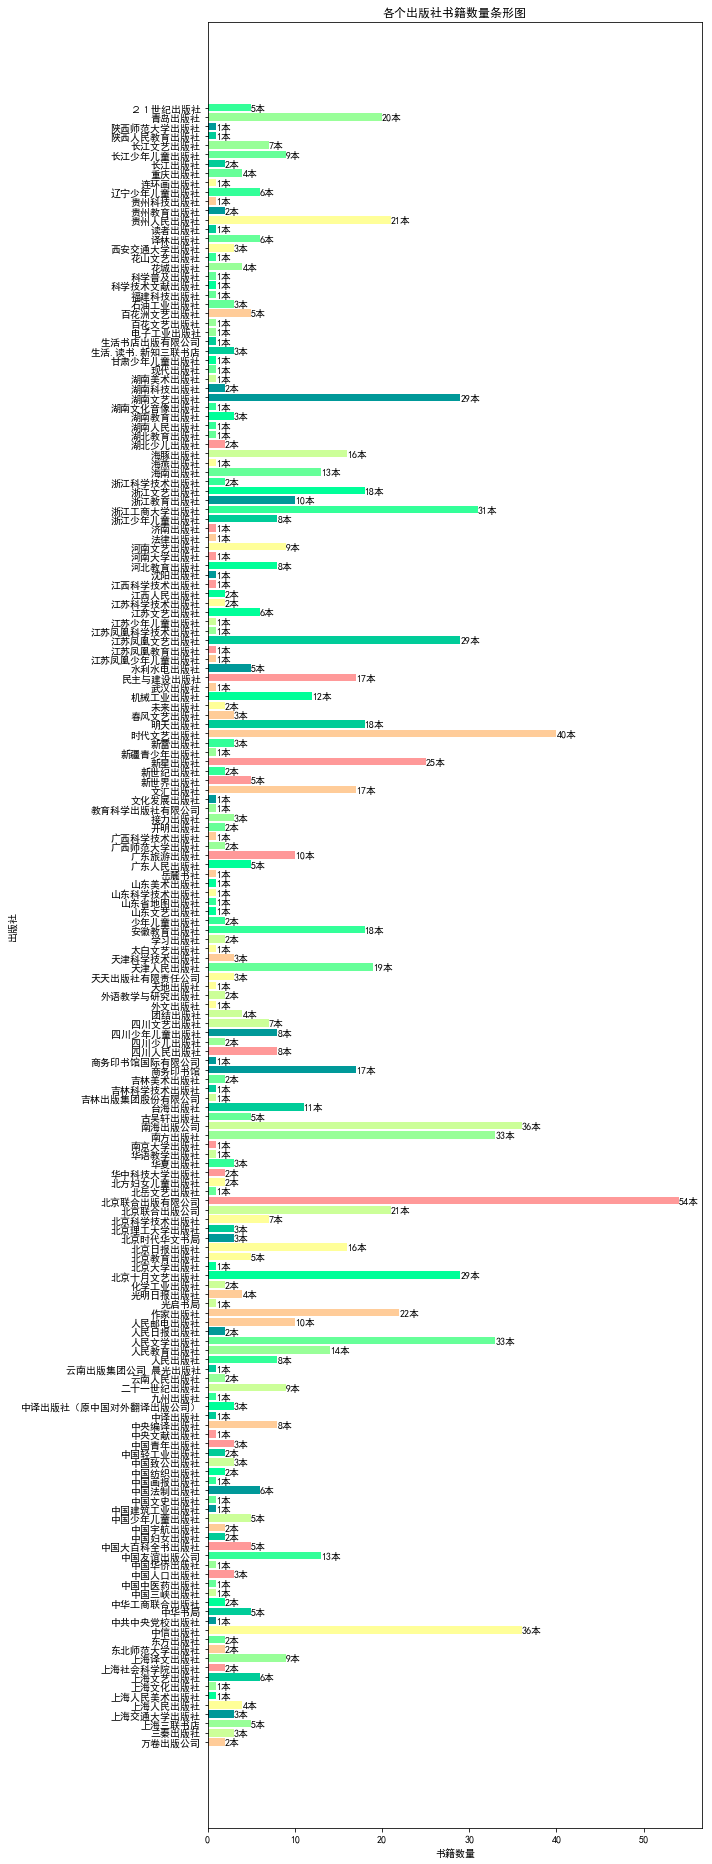

In [39]:
# 统计每个出版社的书籍数量
publisher_counts = book['出版社'].value_counts().sort_values(ascending=False)
# publisher_counts
# publisher_counts.index
# publisher_counts.values

plt.figure(figsize=(10, 26)) 
bars = plt.barh(y=publisher_counts.index,width=publisher_counts.values, height=0.8, color=['#FF9999', '#FFCC99', '#FFFF99', '#CCFF99', '#99FF99', '#66FF99', '#33FF99', '#00FF99', '#00CC99', '#009999'])

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}本', va='center')
plt.xlabel('书籍数量')
plt.ylabel('出版社')
plt.title('各个出版社书籍数量条形图')
plt.tight_layout()  
plt.show()

可以了解到各个出版社的书籍数量，以判断哪个是最高产的出版社。当然这并不代表这个出版社就是优秀的，应该优先选择。还需进一步对出版的质量进行分析。

#### <a id='toc1_10_2_'></a>[4）热门作者推荐](#toc0_)

紧接着前面的分析，不仅要看作者书籍上榜的次数也要看出版的质量，才能评定一个好的作者。结合作者的三个分析，最终评定最热门的作者。

<Container object of 10 artists>

Text(0.5,1,'书籍上榜次数最多的10名作者平均评论数条形图')

Text(0.5,0,'平均评论数')

Text(0,0.5,'作者')

<Container object of 10 artists>

Text(0.5,1,'书籍上榜次数最多的10名作者平均推荐值条形图')

Text(0.5,0,'平均推荐值(%)')

Text(0,0.5,'作者')

Text(99.9833,0,'99.98')

Text(99.7824,1,'99.78')

Text(99.8538,2,'99.85')

Text(99.9769,3,'99.98')

Text(99.97,4,'99.97')

Text(99.94,5,'99.94')

Text(99.475,6,'99.47')

Text(99.9571,7,'99.96')

Text(100,8,'100.00')

Text(99.9,9,'99.90')

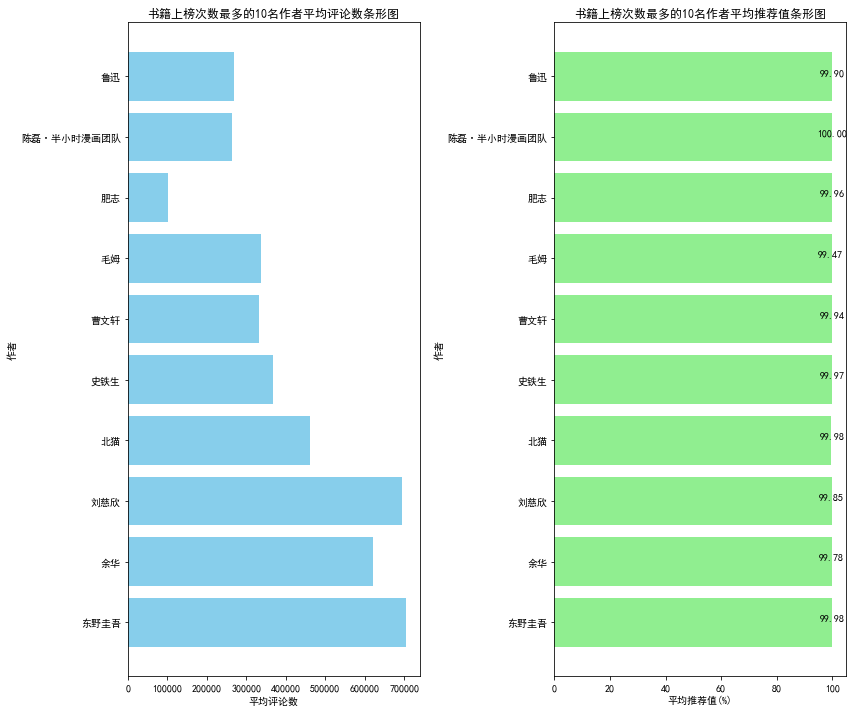

In [58]:
# 获得书籍上榜次数最多的10名作者
top_authors = book['作者'].value_counts().head(10).index
# 指标字典
metrics = {
    '作者': [],
    '平均评论数': [],
    '平均推荐值': []
}
# 遍历作者，计算每位作者图书的平均评论数和推荐值
for author in top_authors:
    author_data = book[book['作者'] == author]
    comments = author_data['评论数'].mean()
    recommendation = author_data['推荐值'].mean()
    # 存入字典
    metrics['作者'].append(author)
    metrics['平均评论数'].append(comments)
    metrics['平均推荐值'].append(recommendation)
df = pd.DataFrame(metrics)

plt.figure(figsize=(12, 10))

# 平均评论数
plt.subplot(1, 2, 1)
plt.barh(df['作者'], df['平均评论数'], color='skyblue')
plt.title('书籍上榜次数最多的10名作者平均评论数条形图')
plt.xlabel('平均评论数')
plt.ylabel('作者')

# 平均推荐值(%)
plt.subplot(1, 2, 2)
plt.barh(df['作者'], df['平均推荐值'], color='lightgreen')
plt.title('书籍上榜次数最多的10名作者平均推荐值条形图')
plt.xlabel('平均推荐值(%)')
plt.ylabel('作者')

# 添加标签
# df['平均推荐值'].index;df['平均推荐值'].values
for y,x in zip(df['平均推荐值'].index, df['平均推荐值'].values):
    plt.text(x, y, f'{x:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

可以发现陈磊·半小时漫画团队虽然是上榜书籍最多且推荐值100%的作者，但是评价评论数却不高。如果要选出5位最热门的作家，那一定是东野圭吾、余华、刘慈欣、曹文轩和毛姆；3位就是东野圭吾、余华和刘慈欣；1位那就是东野圭吾。

#### <a id='toc1_10_3_'></a>[5）热门书籍推荐](#toc0_)

既然有了热门作家推荐，那么再研究一下热门的书籍推荐吧。

<Container object of 10 artists>

Text(0.5,1,'最热门书籍推荐')

Text(0.5,0,'评论数')

Text(0,0.5,'书名')

([<matplotlib.axis.XTick at 0x13549a92668>,
 <a list of 6 Text xticklabel objects>)

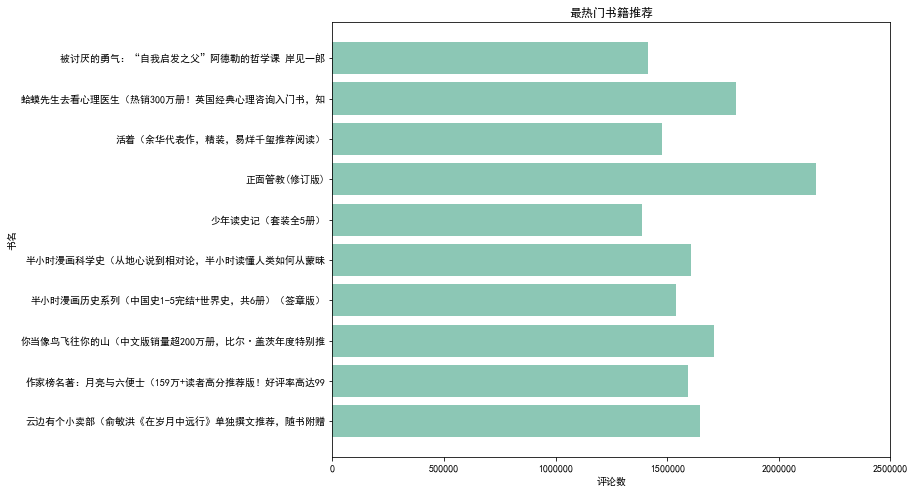

In [67]:
# 查看推荐值100%的最多评论数的书籍
hot_books = book[(book['推荐值'] == 100) & (book['评论数'] > book['评论数'].median())].sort_values(by='评论数', ascending=False).head(10)

plt.figure(figsize=(10, 8))
plt.barh(hot_books['书名'], hot_books['评论数'],color="#8CC7B5")
plt.title('最热门书籍推荐')
plt.xlabel('评论数')
plt.ylabel('书名')
plt.xticks(range(0,2500001,500000))
plt.show()

推荐值100%且评论又最高的这些书都是属于必看系列了，具体有：《被讨厌的勇气》、《蛤蟆先生去看心理医生》、《活着》、《正面管教》、《少年读史记》、《半小时漫画科学史》、《半小时漫画历史系列》、《你当像鸟飞往你的山》、《月亮与六便士》和《云边有个小卖部》。可以通通加入书单里。

## <a id='toc1_12_'></a>[五、结论](#toc0_)
通过对当当网图书数据的分析，我们可以得出以下结论：
1. 书籍出版市场概况：
    - 当当网图书市场呈现多样性，热门书籍众多，但同时也存在大量评论数较少的书籍。
    - 出版商普遍采用高定价策略，随后通过折扣吸引读者购买，平均折扣幅度接近一半。
2. 书籍价格概况：
    - 评论数较多的书籍通常会有折扣，折扣幅度集中在3折至9折之间。
    - 大部分书籍的原价集中在50元以内，折扣后的价格也大多在50元以内。
3. 书籍作者概况：
    - 东野圭吾、余华和刘慈欣等作者的评论热度较高，这可能与他们作品质量高和受众接受度高有关。
4. 书籍出版社概况：
    - 南海出版公司在图书上榜次数上占据领先地位，这可能与其出版策略和市场定位有关。
5. 书籍出版年份概况：
    - 近年来，新出版书籍的评论数普遍较低，可能是因为它们尚未有足够的时间积累评论。
    - 2018年至2022年是出版优秀书籍数量最多的年份，这些书籍大多是最近10年出版的。
    - 奇数年的书籍原价普遍低于偶数年的书籍原价，可能在奇数年购买书籍更便宜。
6. 综合分析的书籍购买建议：
    - 评论数高、推荐值高、上榜次数多的书籍通常是高质量的书籍，值得推荐。
    - 评论数高的书籍并不一定都是好评，需要结合推荐值进行更深入的分析，50万左右的评论数可能较佳。
    - 出版社可以优先选择南海出版公司的书籍。
    - 如果你不知道看什么书籍，你可以关注东野圭吾、余华、刘慈欣、曹文轩和毛姆等热门作家的作品。
    - 在奇数年购买书籍，可能更便宜。
    - 没有必要太在意书籍价格，即使50元内也有很多宝藏书籍。
    - 推荐的书单有：《你当像鸟飞往你的山》、《乌合之众》、《月亮与六便士》、《人生海海》、《云边有个小卖部》、《啊2.0》、《蛤蟆先生去看心理医生》、《医路向前巍子给中国人的救护指南》、《文城》、《生死疲劳》、《活着》、《保重》、《杀死一只知更鸟》、《我与地坛（纪念版）》、《你也走了很远的路吧》、《神奇校车·图画书版（全12册）》、《正面管教(修订版)》、《小熊和最好的爸爸（全7册）》、《少年读史记（套装全5册）》、《马尔克斯：百年孤独（50周年纪念版）》、《白夜行》、《被讨厌的勇气》、《三体：全三册》、《次第花开 修订版》、《额尔古纳河右岸》、《长安的荔枝》、《带壳的牡蛎是大人的心脏》和《真希望你也喜欢自己》、《半小时漫画科学史》和《半小时漫画历史系列》共30本书。